In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [0]:
bs=64

In [0]:
doc(untar_data)

In [0]:
URLs

fastai.datasets.URLs

In [0]:
path=untar_data(URLs.MNIST)

In [0]:
path

PosixPath('/root/.fastai/data/mnist_png')

In [0]:

path.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

In [0]:
path_test=path/'testing'
path_train=path/'training'

In [0]:
path_train.ls()

[PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/7'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/4'),
 PosixPath('/root/.fastai/data/mnist_png/training/0')]

In [0]:
fnames=get_image_files(path_train/'8')
fnames[:2]
doc(ImageDataBunch.from_folder)

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='training', 'testing', ds_tfms=tfms, size=24)

SyntaxError: ignored

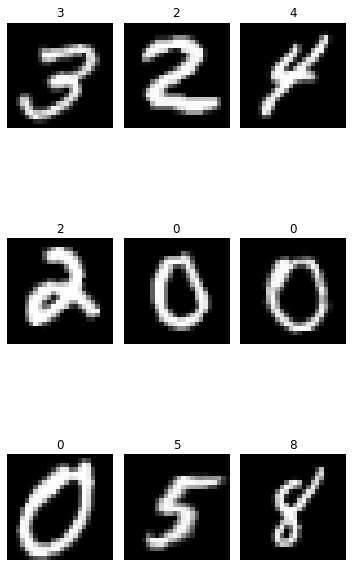

In [0]:
data.show_batch(rows=3, figsize=(5,10))

In [0]:
print(data.classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [0]:
data.c


10

In [0]:
len(data.classes),data.c

(10, 10)

In [0]:
learn= cnn_learner(data, models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 100MB/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.683147,0.380129,0.876400,08:07
1,0.296786,0.139055,0.955000,08:09
2,0.201932,0.095261,0.971300,08:03
3,0.184614,0.088926,0.972600,08:24


Exception: ignored

In [0]:
learn.save("stage-1")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

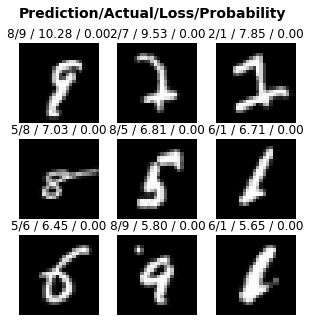

In [0]:
interp.plot_top_losses(9, figsize=(5,5))

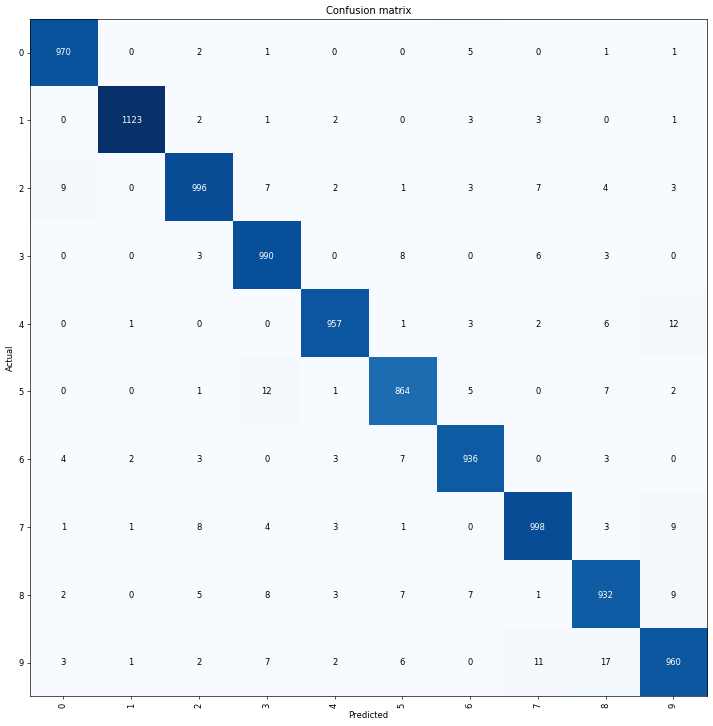

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('9', '8', 17),
 ('4', '9', 12),
 ('5', '3', 12),
 ('9', '7', 11),
 ('2', '0', 9),
 ('7', '9', 9),
 ('8', '9', 9),
 ('3', '5', 8),
 ('7', '2', 8),
 ('8', '3', 8),
 ('2', '3', 7),
 ('2', '7', 7),
 ('5', '8', 7),
 ('6', '5', 7),
 ('8', '5', 7),
 ('8', '6', 7),
 ('9', '3', 7),
 ('3', '7', 6),
 ('4', '8', 6),
 ('9', '5', 6),
 ('0', '6', 5),
 ('5', '6', 5),
 ('8', '2', 5),
 ('2', '8', 4),
 ('6', '0', 4),
 ('7', '3', 4),
 ('1', '6', 3),
 ('1', '7', 3),
 ('2', '6', 3),
 ('2', '9', 3),
 ('3', '2', 3),
 ('3', '8', 3),
 ('4', '6', 3),
 ('6', '2', 3),
 ('6', '4', 3),
 ('6', '8', 3),
 ('7', '4', 3),
 ('7', '8', 3),
 ('8', '4', 3),
 ('9', '0', 3),
 ('0', '2', 2),
 ('1', '2', 2),
 ('1', '4', 2),
 ('2', '4', 2),
 ('4', '7', 2),
 ('5', '9', 2),
 ('6', '1', 2),
 ('8', '0', 2),
 ('9', '2', 2),
 ('9', '4', 2)]

In [0]:
doc(interp.most_confused)

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.057981,0.025810,0.992100,17:28


In [0]:
learn.load('stage-1');
learn.lr_find();
learn.recorder.plot()